In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='brgmcyk')

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/pT_Rebin_2_006zT06zTOldBinNewNewPurity/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/pT_Rebin_2_006zT06zTOldBinNewNewPurity/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/pT_Rebin_2_006zT06zTOldBinNewNewPurity/pPb_SE_L0_Correlation_GMB_Ratio.root
../InputData/pT_Rebin_2_006zT06zTOldBinNewNewPurity/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/pT_Rebin_2_006zT06zTOldBinNewNewPurity/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/pT_Rebin_2_006zT06zTOldBinNewNewPurity/pPb_SE_L0_Correlation_GMB_Ratio.root


In [2]:
print dPhi_Bins[ZYAM_Min_i]
print dPhi_Bins[ZYAM_Max_i]
print(pTbins)

0.392699081699
1.57079632679
[12.0, 22.0, 40.0]


In [3]:
print pTbins
print zTbins

[12.0, 22.0, 40.0]
[0.06  0.08  0.107 0.142 0.19  0.253 0.337 0.45  0.6  ]


**root to numpy**

In [4]:
Corrs = ROOT_to_nparray()
#print(Corrs["p-Pb_Uncorr_Estimate"][0][1])
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [5]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [6]:
#Plot_Sub_UB_Overlay(Corrs)

In [7]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)

In [8]:
#Plot_UB()

**Pedestal Subtraction**

In [9]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
Plot = False
if Plot:
    for ipt in range(N_pT_Bins):
        for izt in range(NzT):
            fig = plt.figure(figsize=(8,7))
            #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
            GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
            plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

            plt.savefig('pics/%s/%s/Befor_After_UE_pp-pPb_pT_%i_zT_%i.pdf'%(Shower,description_string,ipt,izt))

In [10]:
Ped_Sub_After_Cs(Corrs)

/Users/fernando/Library/Python/2.7/lib/python/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


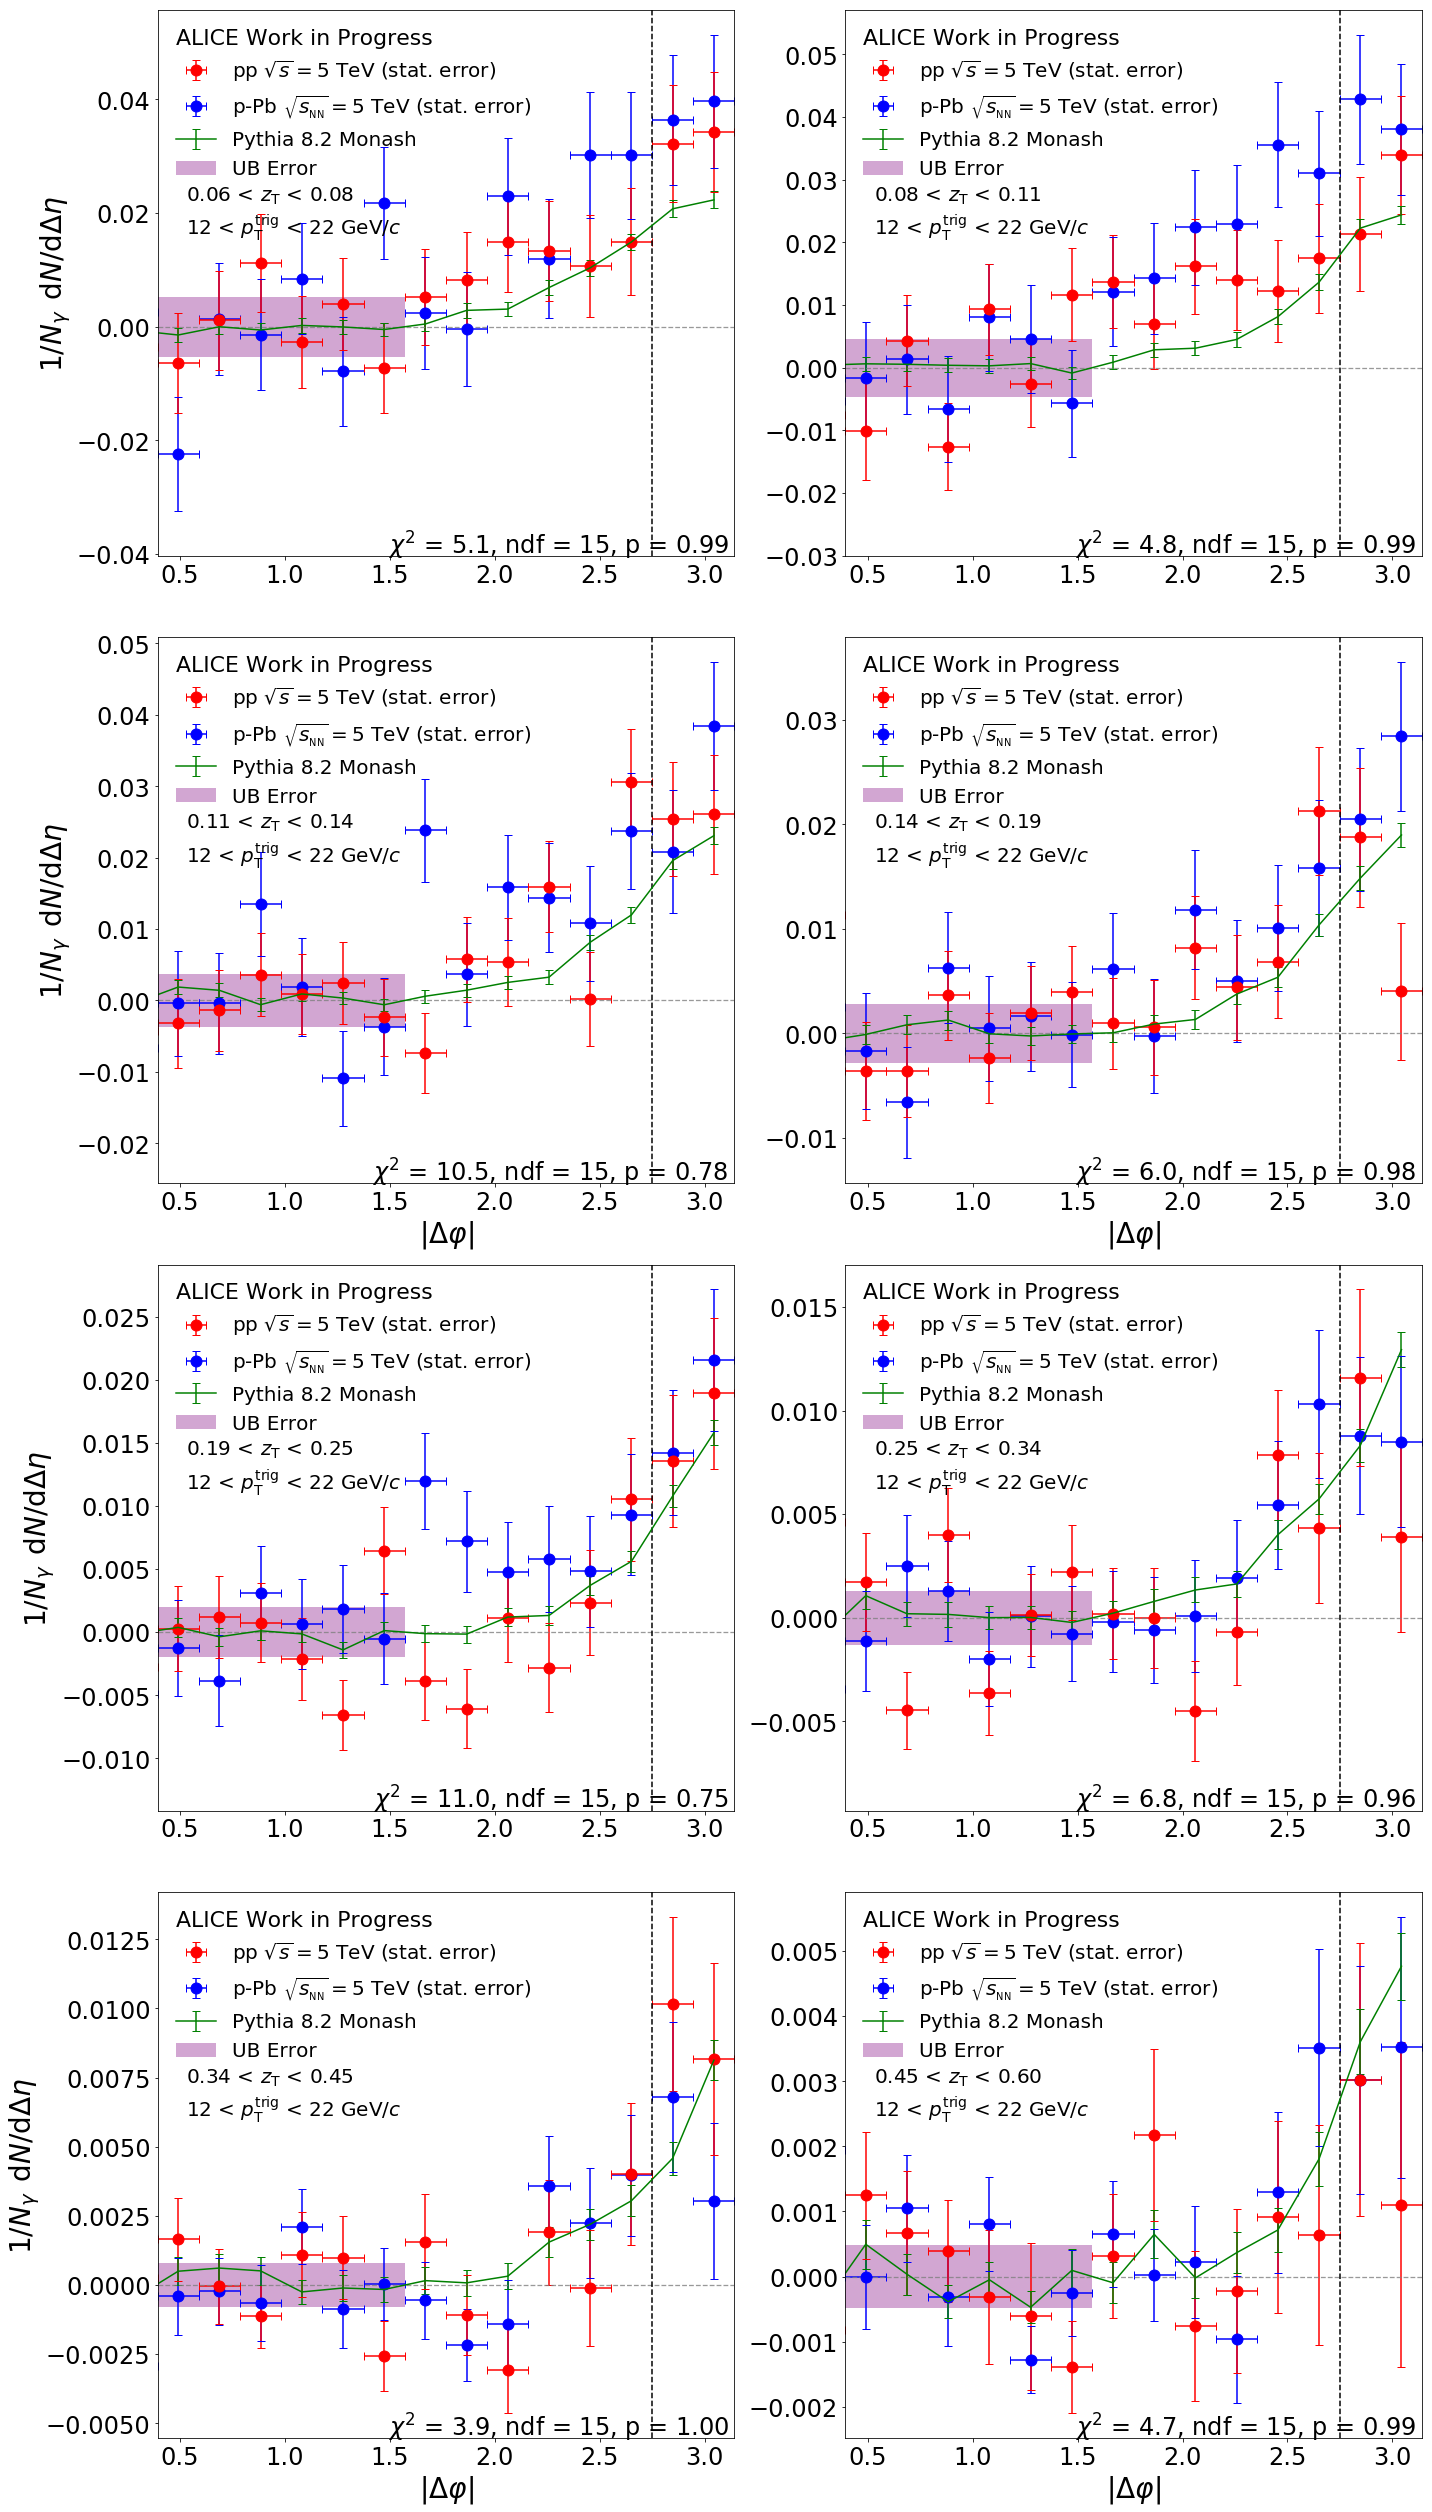

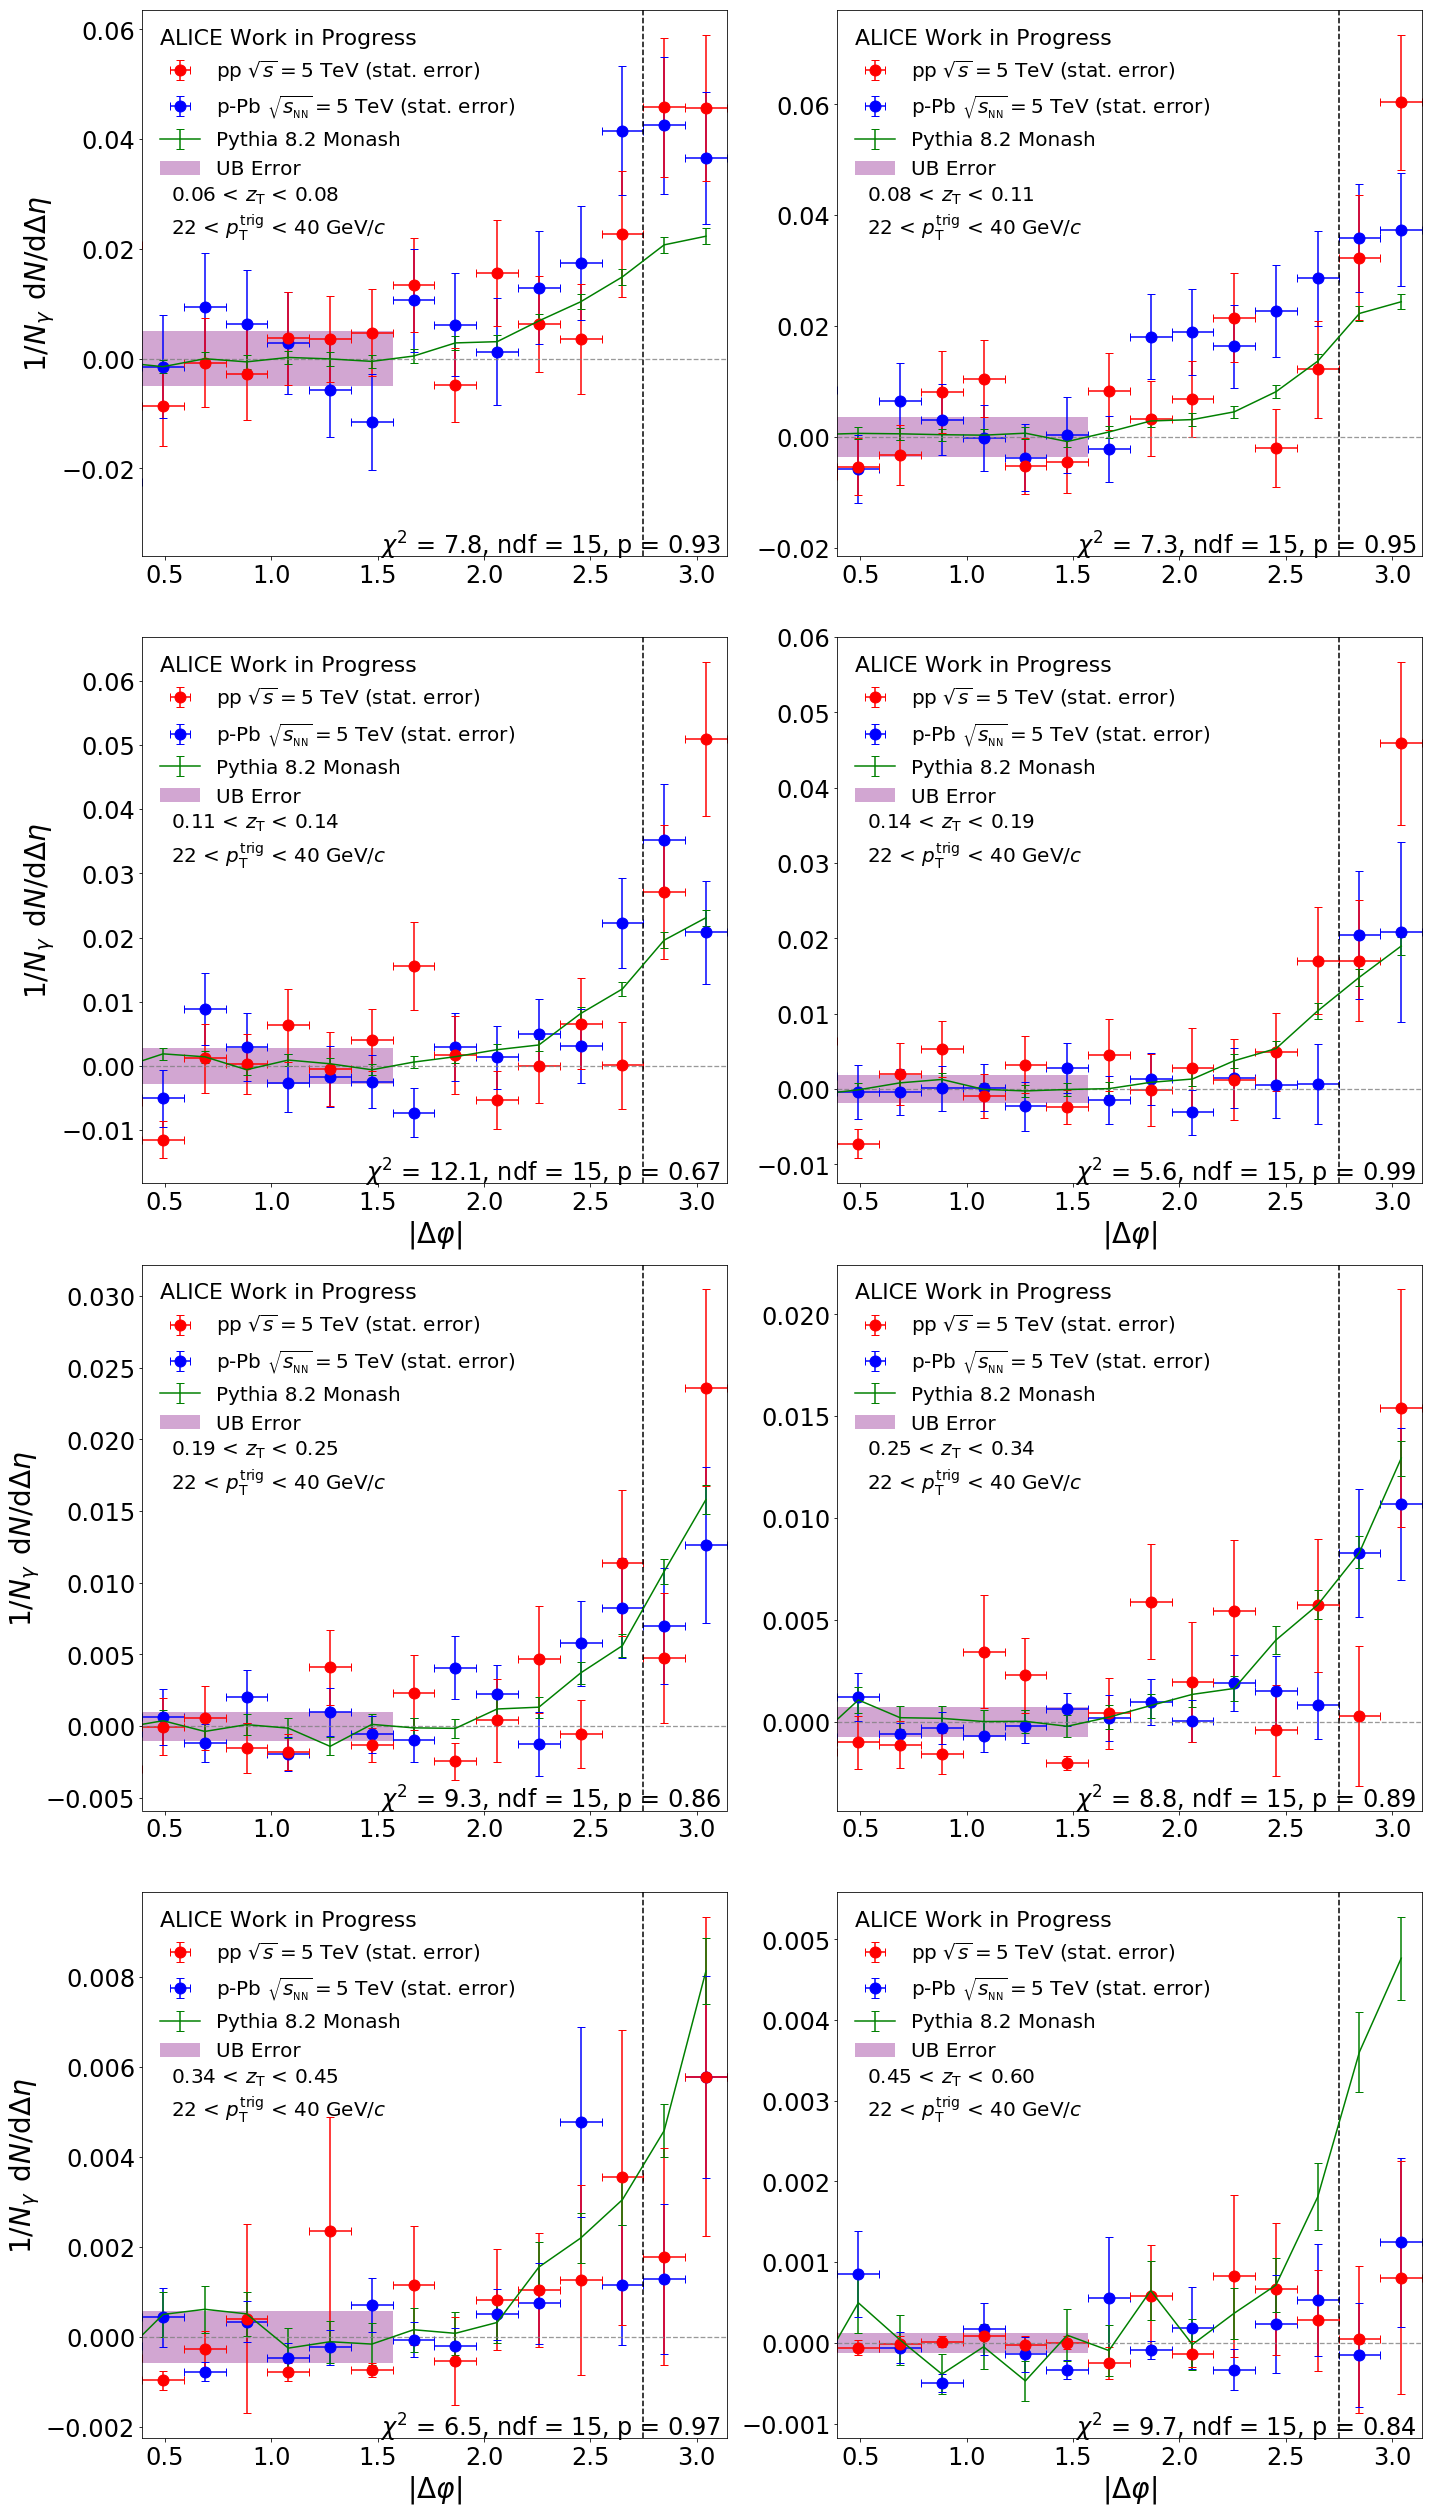

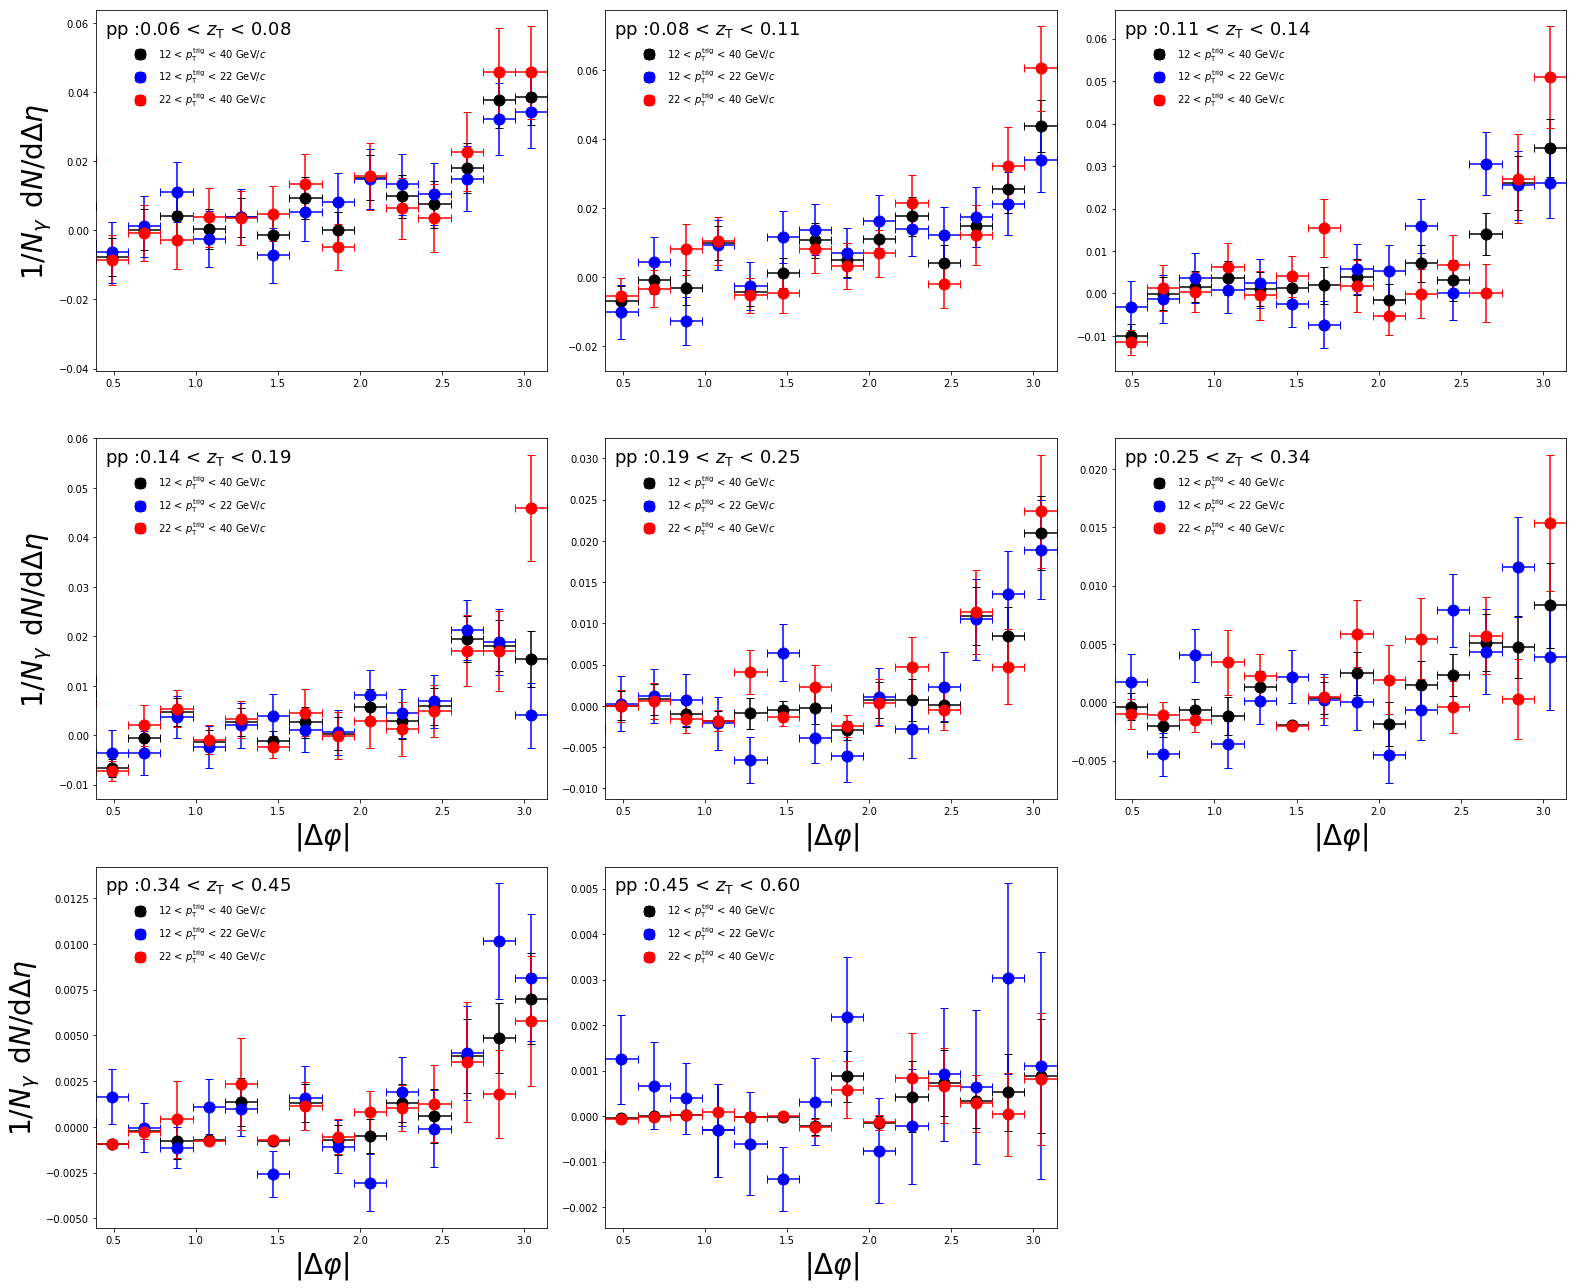

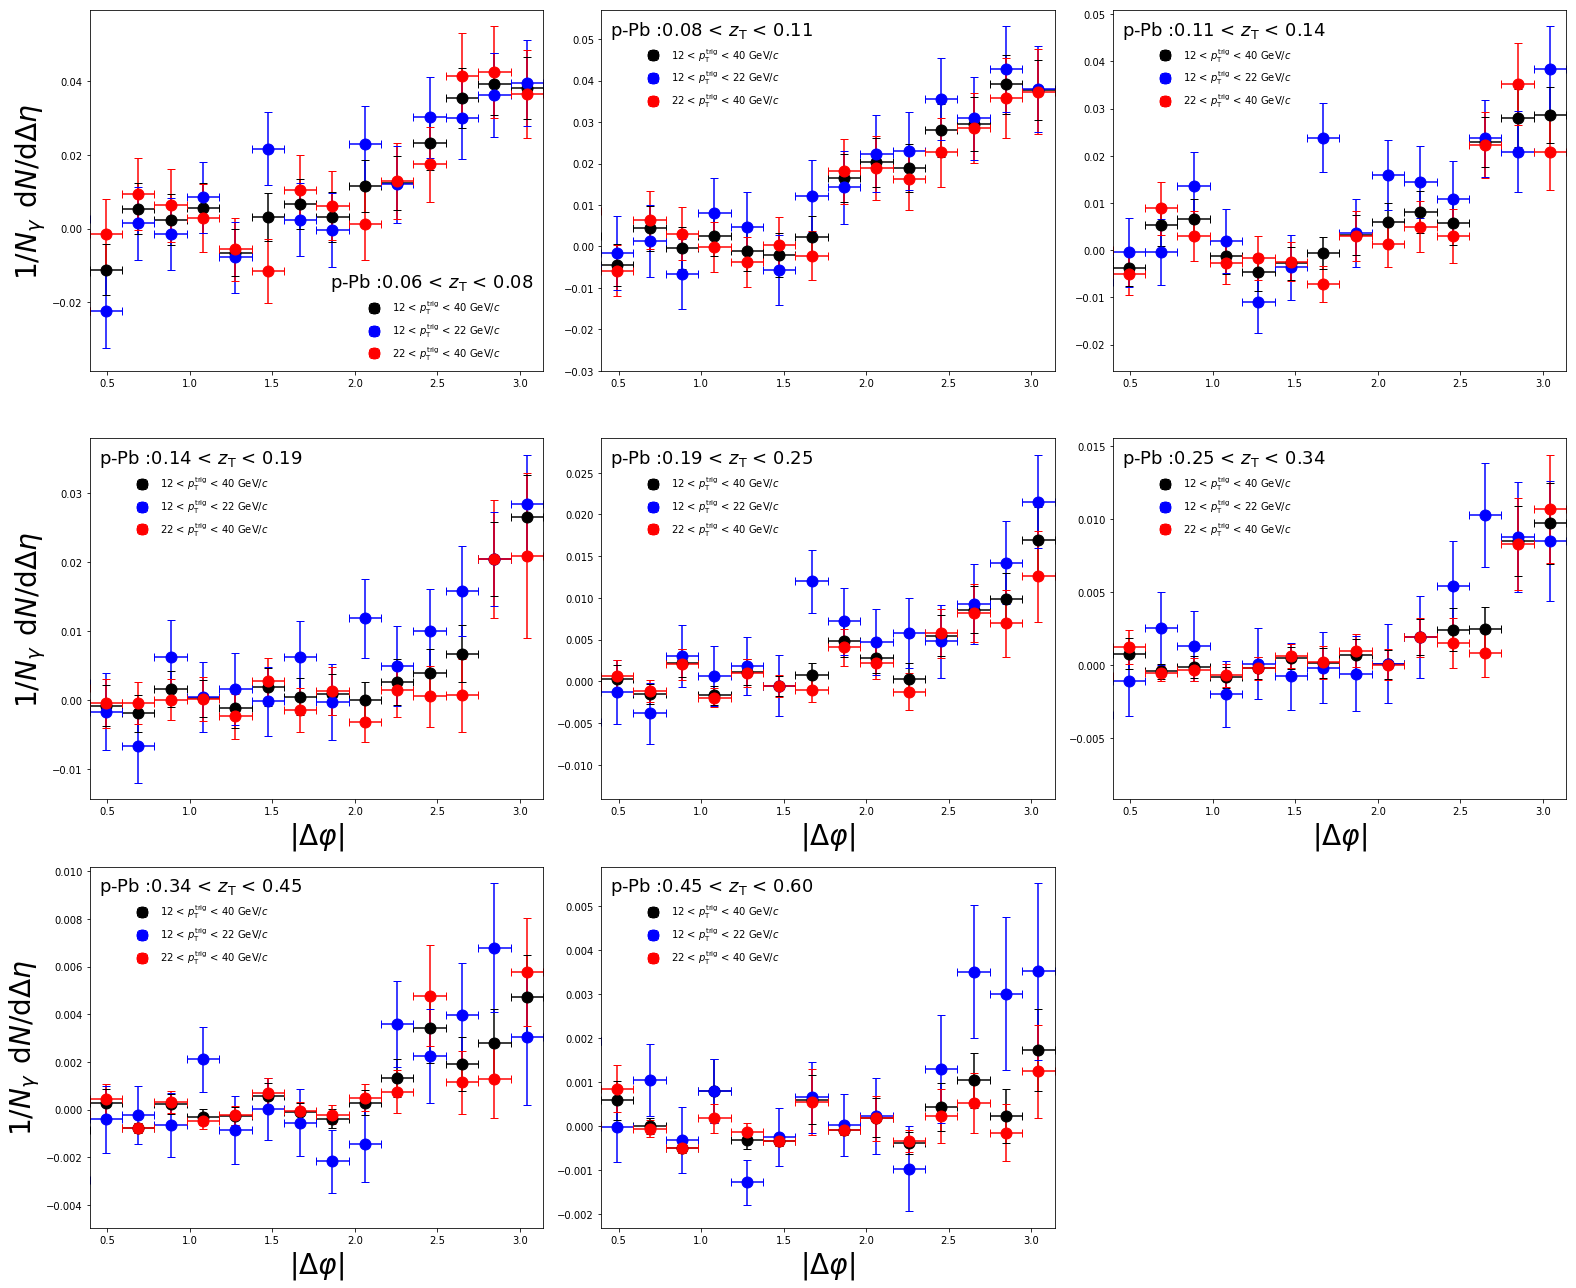

In [11]:
Plot_pp_pPb_Cs(Corrs)
#Plot_pp_pPb_Cs_Individual(Corrs)
Compare_Cs_pTBins()

**Debugging**

In [24]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][3])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][3][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][3][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)
    
    print("non-dphi rate %1.3f"%(Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]))

Number of Away side bins = 2
[-0.00419529  0.01133596 -0.00362544 -0.00358856  0.00364954 -0.00235438
  0.00196075  0.00395809  0.00096745  0.00060365  0.00820469  0.00442009
  0.00684729  0.0212814   0.01875923  0.0040137 ]
pp
0.057991 +\- 0.023902 +\- 0.009207
0.4416982550228988
non-dphi rate 0.011
p-Pb
0.124549 +\- 0.025060 +\- 0.010909
0.2194403236560575
non-dphi rate 0.013


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [25]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)
#Plot_pp_pPb_Cs_Individual(Avg_Corr)

In [26]:
Frags = Get_Fragmentation(Corrs)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
#for i in range(len(Frags["pp_FF"][0])):
#    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

In [27]:
reload(functions_fragmentation)
from functions_fragmentation import *

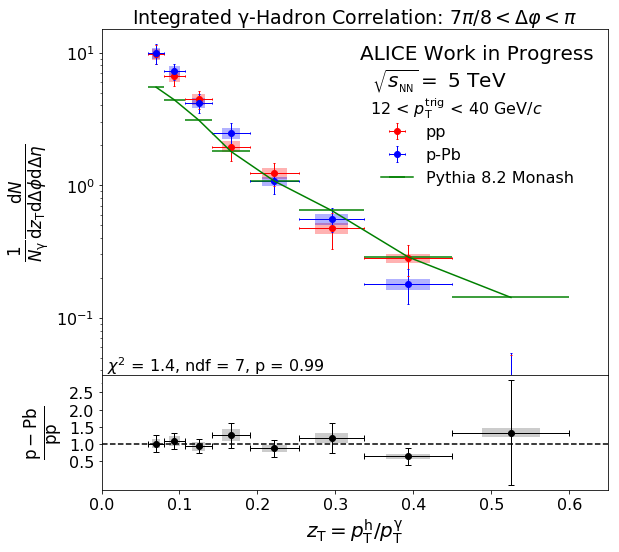

pp_purity_FF_Errors:
1.3349, 0.8215, 0.5912, 0.1905, 0.2070, 0.0740, 0.0651, 0.0111, 
1.0898, 0.8178, 0.5309, 0.3124, 0.1072, 0.0445, 0.0160, 0.0014, 

p-Pb_FF_Errors:
2.3254, 1.5360, 0.9966, 0.5694, 0.3259, 0.1800, 0.0916, 0.0463, 
2.4031, 1.4135, 0.8997, 0.7904, 0.2785, 0.1493, 0.0636, 0.0213, 

pp_FF:
8.4651, 5.2096, 3.7493, 1.2081, 1.3127, 0.4696, 0.4128, 0.0701, 
11.6461, 8.7390, 5.6738, 3.3385, 1.1456, 0.4755, 0.1706, 0.0144, 

pp_FF_Errors:
2.0687, 1.3538, 0.9075, 0.5336, 0.3391, 0.1971, 0.1088, 0.0568, 
2.4854, 1.6341, 1.1915, 0.7274, 0.3382, 0.2090, 0.0999, 0.0291, 

p-Pb_FF:
9.6815, 7.6217, 4.3134, 2.5948, 1.4464, 0.5241, 0.2215, 0.1109, 
10.0792, 6.9067, 4.0755, 2.1949, 0.7920, 0.5755, 0.1592, 0.0186, 

p-Pb_purity_FF_Errors:
1.5267, 1.2019, 0.6802, 0.4092, 0.2281, 0.0827, 0.0349, 0.0175, 
0.9432, 0.6463, 0.3814, 0.2054, 0.0741, 0.0539, 0.0149, 0.0017, 

zT Centers:
0.07, 0.09, 0.12, 0.17, 0.22, 0.30, 0.39, 0.53, 
zT Widths:
0.0100, 0.0135, 0.0175, 0.0240, 0.0315, 0.0420, 0.

In [28]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)
print("zT Centers:")
for izt in zT_centers:
    print("%1.2f,"%(izt)),
print("")
    
print("zT Widths:")
for izt in zT_widths:
    print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

pT_Rebin_2_006zT06zTOldBinNewNewPurity Intg. 7\pi/8  & $2.41 \pm 0.10$ & 2.99  & $2.52 \pm 0.08$ & 3.44  & $1.42/7\ 0.99 $\\


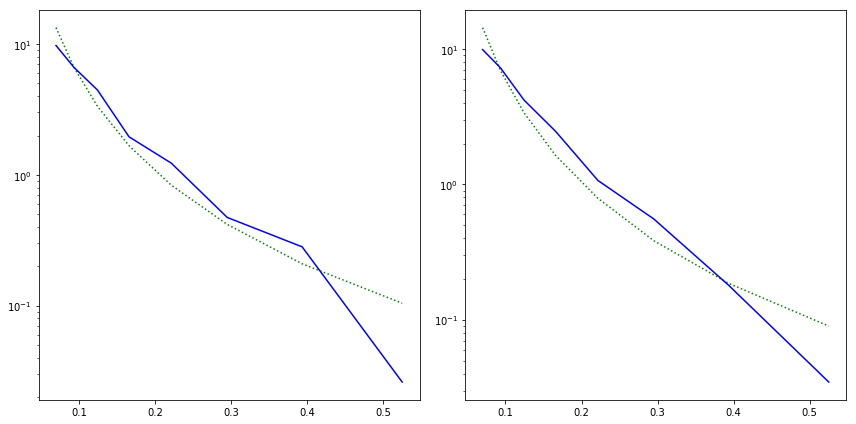

In [29]:
LaTeX_Table(Combined_Frags)

[0.1833654  0.14663594 0.11630872 0.09848722 0.10009065 0.12034508
 0.15196754 0.1893455  0.22968608 0.27167273 0.31464716 0.35825409
 0.40228789 0.44662231 0.49117597 0.53589417 0.58073891 0.62568299
 0.67070643 0.71579426]
0.874784446858


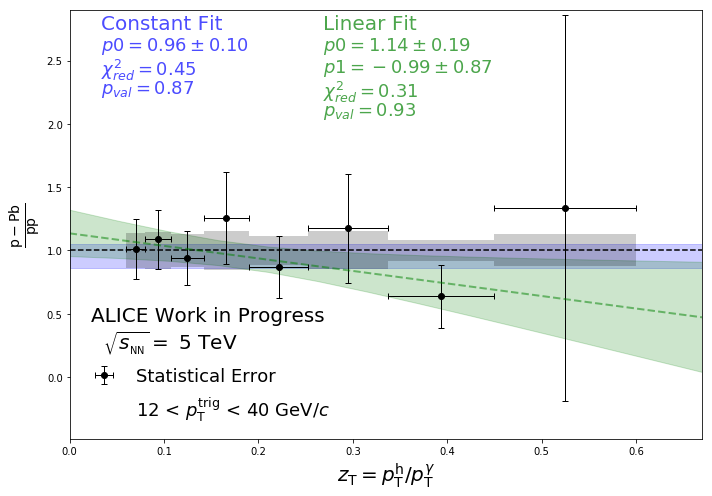

                Central Values:
[1.01093505 1.08854106 0.93861889 1.25833172 0.869122   1.17409343
 0.63776337 1.33439492]

                Satistical Uncertainty Absolute:
[0.2373999  0.23161964 0.21351727 0.36434153 0.24156255 0.43153136
 0.24959065 1.5229401 ]

               Relative Satistical Uncertainty:
[0.234832   0.21277988 0.22748026 0.28954331 0.27793859 0.36754431
 0.39135307 1.14129639]

                Ratio Uncertainty from Purity:
[0.11924888 0.12223105 0.11590261 0.12555039 0.09638454 0.12507948
 0.07355576 0.08419741]

                Ratio Uncertainty from Single Track Efficiency:
[0.0714839  0.07697148 0.06637038 0.08897749 0.06145621 0.08302094
 0.04509668 0.09435597]

                Full Systematic Uncertainty:
[0.13903325 0.14444735 0.13356063 0.15388272 0.1143103  0.15012446
 0.08627955 0.12646048]

****************************************
Minimizer is Linear
Chi2                      =      3.14836
NDf                       =            7
p0                  

In [30]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

### Compare Different Integrations

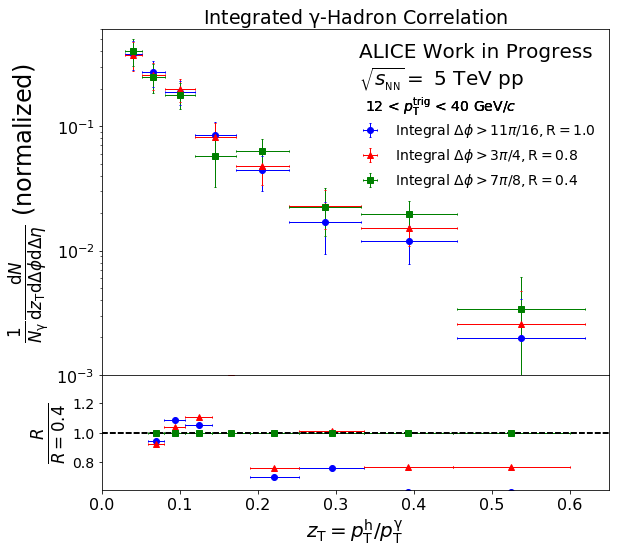

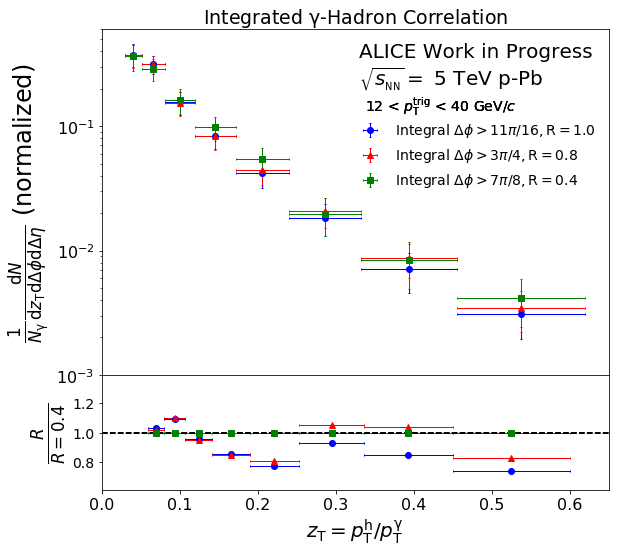

In [31]:
#ranges = (1.9,2.15,2.7,2.9)
ranges = (1.9,2.15,2.7)
strings = ("11\pi/16, \mathrm{R} = 1.0","3\pi/4,\mathrm{R} = 0.8","7\pi/8, \mathrm{R} = 0.4","15\pi/16, \mathrm{R} = 0.2")

Compare_FF_Integration(ranges,strings)

In [33]:
reload(functions_fragmentation)
from functions_fragmentation import *

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_8_006zT06zT_Small_Zyam_Avg
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT_Small_Zyam_Avg.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT_Small_Zyam_Avg.npy


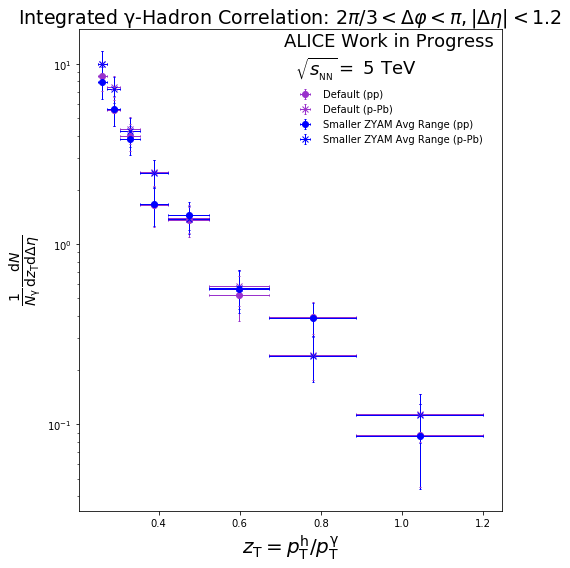

                Central Values:


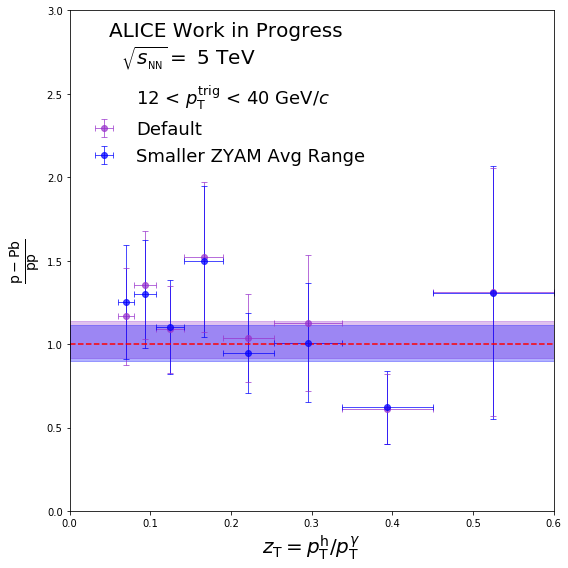

                Central Values:
[1.25447735 1.30212027 1.10274259 1.4968685  0.9471799  1.00968907
 0.62082376 1.30841238]

****************************************
Minimizer is Linear
Chi2                      =      6.60779
NDf                       =            7
p0                        =      1.02796   +/-   0.10807     

****************************************
Minimizer is Linear
Chi2                      =      5.93842
NDf                       =            7
p0                        =      1.00803   +/-   0.109698    


In [34]:
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zT_Small_Zyam_Avg"]
string_descriptions = ["Default","Smaller ZYAM Avg Range","9 zT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

zT_Rebin_8_006zT06zTOldBinNewNewPurity


RuntimeError: xdata and ydata must be the same length

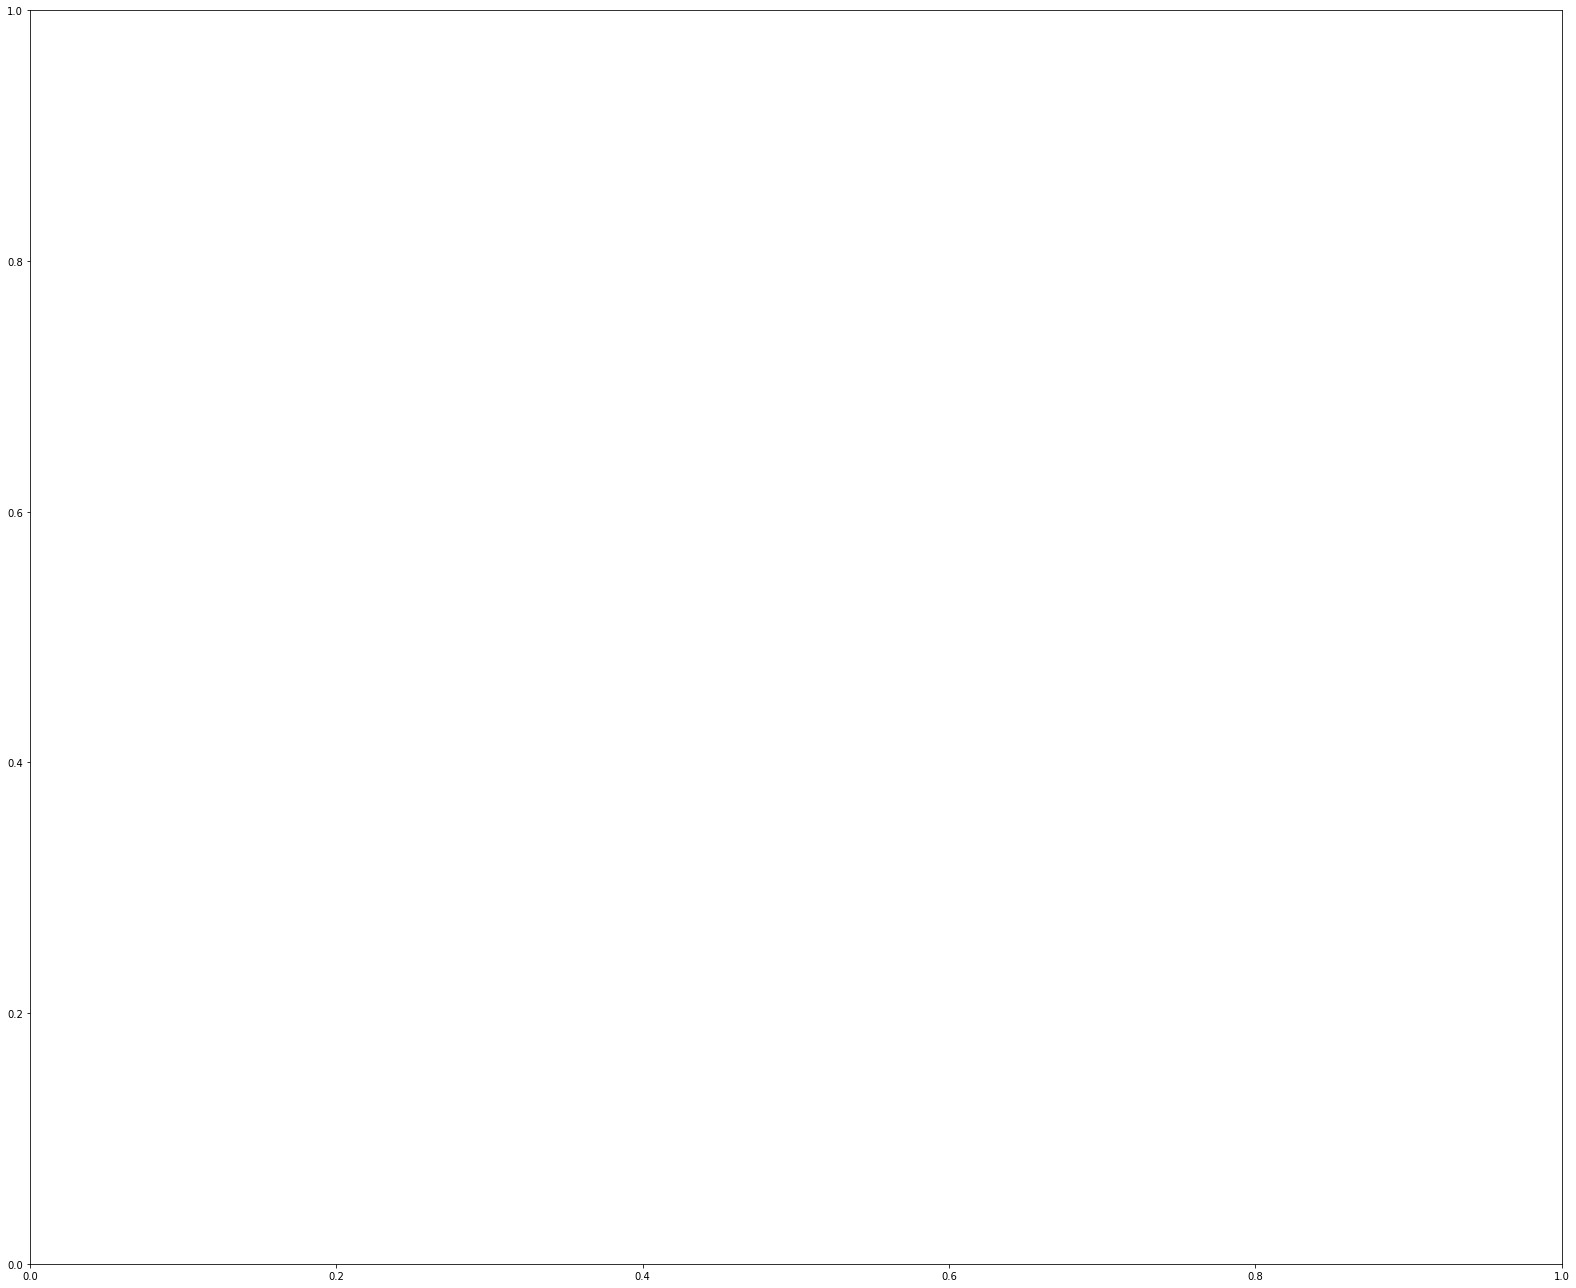

In [35]:
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","pT_Rebin_2_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["Default","2 pT Bins","9 zT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

In [ ]:
strings = ["zT_Rebin_7_006zT06zT","zT_Rebin_8_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["7 zT Bins","8 zT Bins","9 zT Bins","4 pT Bins"]

strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["Old","New"]

colors = ["red","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

## Compare Different pT Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
#Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTpT2"]
string_descriptions = ["1 pT Bin","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)